<a href="https://colab.research.google.com/github/doublescoop/AppliedMachineLearing/blob/master/Wine_RecomendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set Up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install dtreeviz

     |████████████████████████████████| 51kB 2.6MB/s 
     |████████████████████████████████| 204.2MB 70kB/s 
     |████████████████████████████████| 204kB 40.3MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.1.3-cp36-none-any.whl size=52493 sha256=fe0a058103724cdfdb196d74060eb562b4a7df877f7eb16c9bbb07a39eca46f5
  Stored in directory: /root/.cache/pip/wheels/80/a9/1e/4751fda06e88399ee09410646e9d55c88787276f9537b8ebd0
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=607299a319f9e149e36b200dc667db8f954665722e7eb3be98e52ec538580bc9
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built dtreeviz pyspark


In [ ]:
from google.colab import files
import io
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn import cluster

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import numpy as np
import graphviz 
#from dtreeviz.trees import dtreeviz

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import defaultdict



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Upload and Processing

In [ ]:
df_reviews = pd.read_csv('drive/My Drive/AML Project/winemag-data-130k-v2.csv')
df_reviews = df_reviews.drop(df_reviews.columns[0], axis=1)
df_reviews = df_reviews.drop('region_2', axis=1)
df_reviews = df_reviews.drop('taster_twitter_handle', axis=1)
df_reviews['points'] = df_reviews['points'].astype(int)
df_reviews['price'] = df_reviews['price'].astype(float)
df_red = pd.read_csv('drive/My Drive/AML Project/winequality-red.csv')
df_white = pd.read_csv('drive/My Drive/AML Project/winequality-white.csv')
del df_white['Unnamed: 0']
df_white = df_white.rename(columns={"fixed.acidity": "fixed acidity", "volatile.acidity": "volatile acidity", "citric.acid": "citric acid", "residual.sugar": "residual sugar", "free.sulfur.dioxide": "free sulfur dioxide", "total.sulfur.dioxide": "total sulfur dioxide"})
df_white.insert(0, "color", ["0"]* len(df_white))
df_red.insert(0, "color", ["1"]* len(df_red))

print(df_reviews)

         country                                        description  \
0          Italy  Aromas include tropical fruit, broom, brimston...   
1       Portugal  This is ripe and fruity, a wine that is smooth...   
2             US  Tart and snappy, the flavors of lime flesh and...   
3             US  Pineapple rind, lemon pith and orange blossom ...   
4             US  Much like the regular bottling from 2012, this...   
...          ...                                                ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967        US  Citation is given as much as a decade of bottl...   
129968    France  Well-drained gravel soil gives this wine its c...   
129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970    France  Big, rich and off-dry, this is powered by inte...   

                                   designation  points  price  \
0                                 Vulkà Bianco      87    NaN   
1                

In [ ]:
print(df_red.shape)
print(df_red.head())

print(df_white.shape)
print(df_white.head())

print(df_red.shape[0]+df_white.shape[0])

(1599, 13)
  color  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.4              0.70         0.00             1.9   
1     1            7.8              0.88         0.00             2.6   
2     1            7.8              0.76         0.04             2.3   
3     1           11.2              0.28         0.56             1.9   
4     1            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2     

In [ ]:
for col1, col2 in zip(df_red.columns, df_white.columns): 
    print(col1 == col2) 
df = pd.concat([df_red, df_white])
print(df.shape)

print(df.isna().sum())

True
True
True
True
True
True
True
True
True
True
True
True
True
(6497, 13)
color                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## Priliminary Data Analysis

In [ ]:
feature_names = list(df.columns)[:-1] 
feature_names

['color',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [ ]:
colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
df_pivot_table = df.pivot_table(colum_names,
               ['quality'], aggfunc='median')
df_pivot_table

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,10.15,0.0550,0.33,0.995900,7.45,17.0,3.245,3.15,0.505,102.5,0.415
4,10.00,0.0505,0.26,0.994995,7.00,15.0,3.220,2.20,0.485,102.0,0.380
5,9.60,0.0530,0.30,0.996100,7.10,27.0,3.190,3.00,0.500,127.0,0.330
6,10.50,0.0460,0.31,0.994700,6.90,29.0,3.210,3.10,0.510,117.0,0.270
7,11.40,0.0390,0.32,0.992400,6.90,30.0,3.220,2.80,0.520,114.0,0.270
8,12.00,0.0370,0.32,0.991890,6.80,34.0,3.230,4.10,0.480,118.0,0.280
9,12.50,0.0310,0.36,0.990300,7.10,28.0,3.280,2.20,0.460,119.0,0.270


Correlation matrix:

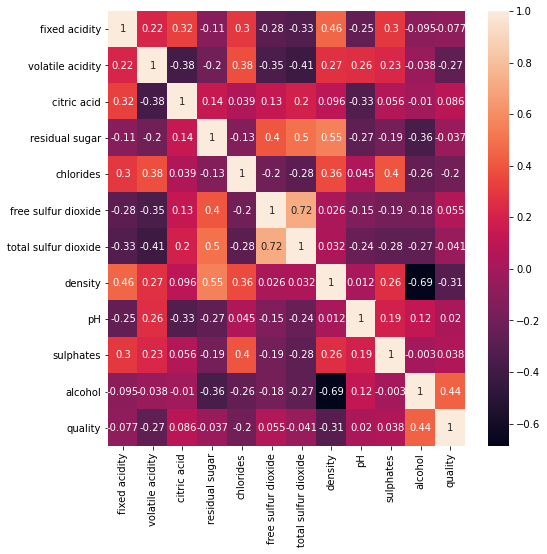

In [ ]:
corr = df.corr()
plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot=True)

In [ ]:
fig = px.scatter_matrix(df, dimensions=['quality','alcohol','density','residual sugar','chlorides','fixed acidity','volatile acidity','total sulfur dioxide'])

fig.update_layout(
    width=1000,
    height=1000,
)

fig.show()

In [ ]:
for i in list(['quality','alcohol','density','residual sugar','chlorides','fixed acidity','volatile acidity','total sulfur dioxide']): 
    fig = px.scatter(df, x="quality", y=i,
              color="color",color_discrete_map={'1': '#7f7f7f','0': 'red'},
                  trendline="ols",
            log_x=True)
    fig.show()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
df.columns

Index(['color', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
fig = px.scatter(df, x="fixed acidity", y="total sulfur dioxide", color="color",color_discrete_map={'1': '#7f7f7f','0': 'red'},log_x=True)
fig.show()

In [ ]:
for col in df.columns:
    fig = px.scatter(df, x="quality", y=col,color="color",color_discrete_map={'1': '#7f7f7f','0': 'red'},log_x=True)
#fig.layout.plot_bgcolor='#7f7f7f'
    fig.show()

In [ ]:
fig = px.scatter(df, x="residual sugar", y="fixed acidity",trendline="ols",log_x=True)
fig.show()

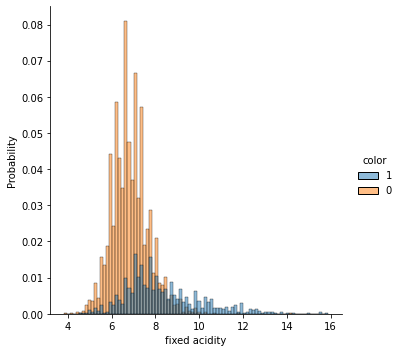

In [ ]:
sns.displot(df, x="fixed acidity", hue="color",stat="probability")

## Data Scalling

In [ ]:
#X = df.iloc[:,:-1]
X = df[['alcohol','density','residual sugar','chlorides','fixed acidity','volatile acidity','total sulfur dioxide']]
y = df['quality']

In [ ]:
# 6-9 = good quality (1)
# 3-5 = bad quality (0) 
y_binary = y.copy()
y_binary[y_binary < 6] = 0
y_binary[y_binary >= 6] = 1

In [ ]:
y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
y_binary.value_counts()

1    4113
0    2384
Name: quality, dtype: int64

Split the data. 85% train, 15% test:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size = 0.15, random_state=42)

In [ ]:
X_train_scaled = StandardScaler().fit_transform(X_train)
print(X_train_scaled)

[[ 0.84906684 -0.10595218  1.77871886 ... -1.32049485 -1.15767415
  -0.29654652]
 [-0.66000699  1.13169696  1.09117423 ...  1.54301481 -0.66529301
   0.52359573]
 [ 1.18441658 -1.17106042 -0.80478219 ...  0.61430897  0.13482634
  -0.4035216 ]
 ...
 [-0.82768186 -0.03295411  0.02860525 ... -0.62396547  0.19637398
   1.20110454]
 [-0.82768186  0.22253915  0.52863771 ... -0.54657332 -0.48065008
   1.45071305]
 [-0.82768186  0.91933893 -0.57560065 ... -0.00482825  1.73506504
  -0.54615503]]


## Decision Tree

Decision Tree Classifier:

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

confidence_score = dt_classifier.score(X_test, y_test)
print(confidence_score)

y_pred = dt_classifier.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=1))

0.7733333333333333
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       335
           1       0.84      0.81      0.82       640

    accuracy                           0.77       975
   macro avg       0.75      0.76      0.75       975
weighted avg       0.78      0.77      0.77       975



In [ ]:
dt_classifier = DecisionTreeClassifier(criterion='entropy')
dt_classifier.fit(X_train, y_train)

confidence_score = dt_classifier.score(X_test, y_test)
print(confidence_score)

y_pred = dt_classifier.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=1))

0.7764102564102564
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       335
           1       0.84      0.81      0.83       640

    accuracy                           0.78       975
   macro avg       0.75      0.76      0.76       975
weighted avg       0.78      0.78      0.78       975



In [ ]:
dot_data = tree.export_graphviz(dt_classifier, out_file=None, max_depth = 4, feature_names = feature_names, class_names = ['bad','good'], filled=True) 
graph = graphviz.Source(dot_data,) 
graph.render("wine_decisions-3")

'wine_decisions-3.pdf'

In [ ]:
dt_classifier2 = DecisionTreeClassifier()
dt_classifier2.fit(X_train_scaled, y_train)

confidence_score2 = dt_classifier2.score(X_test, y_test)
print(confidence_score2)

y_pred2 = dt_classifier2.predict(X_test)

print(classification_report(y_test, y_pred2, zero_division=1))

0.3415384615384615
              precision    recall  f1-score   support

           0       0.34      0.99      0.51       335
           1       0.00      0.00      0.00       640

    accuracy                           0.34       975
   macro avg       0.17      0.50      0.25       975
weighted avg       0.12      0.34      0.17       975



In [ ]:
dot_data = tree.export_graphviz(dt_classifier, out_file=None, max_depth = 4, feature_names = feature_names, class_names = ['bad','good'], filled=True) 
graph = graphviz.Source(dot_data,) 
graph.render("wine_decisions-4")

'wine_decisions-4.pdf'

## Random Forest

Random Forest:

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

confidence_score = rf_classifier.score(X_test, y_test)
print(confidence_score)

rf_pred = rf_classifier.predict(X_test)

print(classification_report(y_test, rf_pred, zero_division=1))

0.8184615384615385
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       335
           1       0.85      0.87      0.86       640

    accuracy                           0.82       975
   macro avg       0.80      0.79      0.80       975
weighted avg       0.82      0.82      0.82       975



In [ ]:
dot_data = tree.export_graphviz(rf_classifier.estimators_[0], out_file=None, max_depth = 4, feature_names = feature_names, class_names = ['bad','good'], filled=True) 
graph = graphviz.Source(dot_data,) 
graph.render("wine_decisions-forest")

'wine_decisions-forest.pdf'

In [ ]:
rf_classifier2 = RandomForestClassifier()
rf_classifier2.fit(X_train_scaled, y_train)

confidence_score2 = rf_classifier2.score(X_test, y_test)
print(confidence_score2)

rf_pred2 = rf_classifier2.predict(X_test)

print(classification_report(y_test, rf_pred2, zero_division=1))

0.3671794871794872
              precision    recall  f1-score   support

           0       0.35      0.98      0.52       335
           1       0.81      0.05      0.09       640

    accuracy                           0.37       975
   macro avg       0.58      0.51      0.30       975
weighted avg       0.65      0.37      0.24       975



## KMeans

In [ ]:
X_normalized = normalize(X, norm='l2')
X_normalized.shape

(6497, 7)

In [ ]:
def fit_kmeans(X,k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    dist = kmeans.transform(X)
    return {'centers':kmeans.cluster_centers_,'labels':kmeans.labels_,'inertia':kmeans.inertia_,'dist':dist}

In [ ]:
intertias = []
models = []
for k in range(2,50):
    print(k)
    model = fit_kmeans(X_normalized,k)
    intertias.append(model['inertia'])
    print(intertias[-1])
    models.append(model)

In [ ]:
inertias = [model['inertia'] for model in models]
fig = go.Figure()
fig.add_traces(go.Scatter(y = inertias))
fig.show()

In [ ]:
k = 5
model = fit_kmeans(X_normalized,k)
labels = model['labels']
groups = [df[labels==i] for i in range(k)]

In [ ]:
pd.set_option('display.max_columns', None)
#movies.head()
average = []
for group in groups:
    print('len of group' , len(group))
    group.mean(axis = 0).to_numpy()
    average.append(group.mean(axis = 0).to_numpy())
average = np.array(average)
average

len of group 3671
len of group 334
len of group 567
len of group 227
len of group 1698


array([[            inf, 6.88835467e+000, 2.86051485e-001,
        3.37444838e-001, 7.52342686e+000, 4.96483247e-002,
        3.93343776e+001, 1.55293789e+002, 9.95040087e-001,
        3.19112231e+000, 4.98011441e-001, 1.01235749e+001,
        5.77989649e+000],
       [            inf, 8.85029940e+000, 4.90583832e-001,
        3.09880240e-001, 2.43832335e+000, 8.26197605e-002,
        8.74550898e+000, 2.16586826e+001, 9.96677904e-001,
        3.27098802e+000, 6.70838323e-001, 1.06111277e+001,
        5.79341317e+000],
       [            inf, 8.13527337e+000, 5.11040564e-001,
        2.41022928e-001, 2.52416226e+000, 8.14656085e-002,
        1.54453263e+001, 3.88095238e+001, 9.96381305e-001,
        3.32261023e+000, 6.35343915e-001, 1.04835097e+001,
        5.68606702e+000],
       [4.89476260e+223, 8.70660793e+000, 5.16277533e-001,
        3.09118943e-001, 2.53722467e+000, 8.36035242e-002,
        5.08810573e+000, 1.22775330e+001, 9.96318150e-001,
        3.29519824e+000, 6.21982379e-

In [ ]:
average=pd.DataFrame(average, columns=groups[0].columns)
average = average.drop(columns=['color'])

In [ ]:
average


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.888355,0.286051,0.337445,7.523427,0.049648,39.334378,155.293789,0.995040,3.191122,0.498011,10.123575,5.779896
1,8.850299,0.490584,0.309880,2.438323,0.082620,8.745509,21.658683,0.996678,3.270988,0.670838,10.611128,5.793413
2,8.135273,0.511041,0.241023,2.524162,0.081466,15.445326,38.809524,0.996381,3.322610,0.635344,10.483510,5.686067
3,8.706608,0.516278,0.309119,2.537225,0.083604,5.088106,12.277533,0.996318,3.295198,0.621982,10.996696,5.757709
4,7.093993,0.345056,0.306873,2.900265,0.052432,24.200824,88.270318,0.992785,3.222350,0.528834,11.199688,5.958775


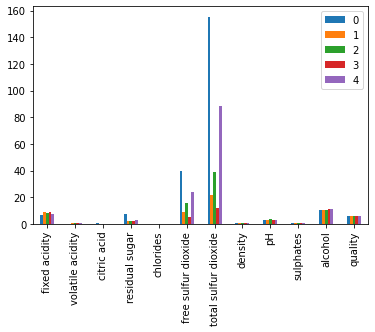

In [ ]:
pd.DataFrame(average.T).plot.bar()


## Creating Text for Wines

In [ ]:
df

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,0,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,0,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,0,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
hasname = df_reviews['taster_name'].count()
nan = df_reviews['taster_name'].isna().sum()
r = hasname/(df_reviews.shape[0])
print(r)

0.7980780327919305


## Wine Mag - Reviews Data

In [ ]:
print(df_reviews.columns)
print(df_reviews.isna().sum())

df_reviews.describe(include='all',).T

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'taster_name', 'title', 'variety', 'winery'],
      dtype='object')
country           63
description        0
designation    37465
points             0
price           8996
province          63
region_1       21247
taster_name    26244
title              0
variety            1
winery             0
dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,129908,43,US,54504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,129971,119955,"Ripe plum, game, truffle, leather and menthol ...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,92506,37979,Reserve,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,129971,NaN,NaN,NaN,88.4471,3.03973,80,86,88,91,100
price,120975,NaN,NaN,NaN,35.3634,41.0222,4,17,25,42,3300
province,129908,425,California,36247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,108724,1229,Napa Valley,4480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,103727,19,Roger Voss,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,129971,118840,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variety,129970,707,Pinot Noir,13272,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'average points')

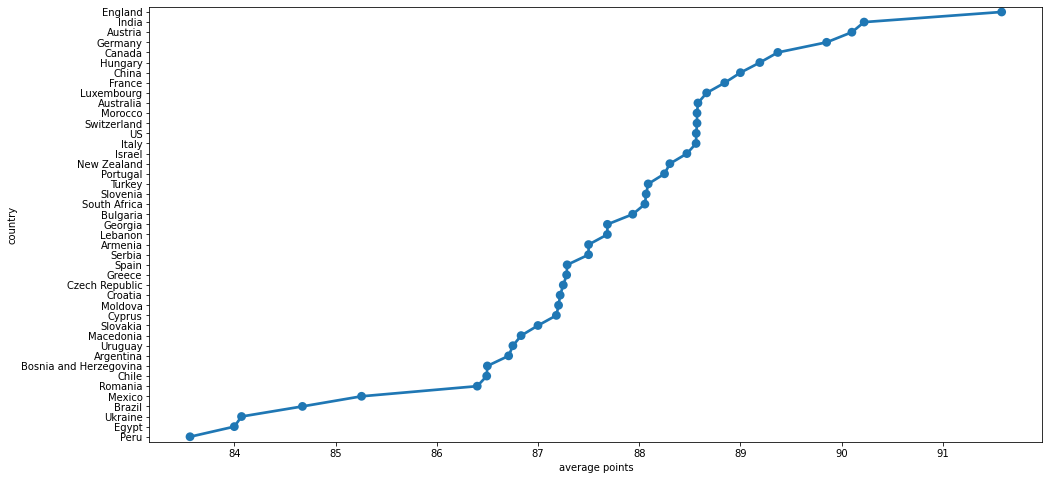

In [ ]:
# average wine rating by country
avg_rating = df_reviews.groupby(['country']).mean()['points']
count = avg_rating.sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = count['points'], y = count.index)
plt.xlabel('average points')

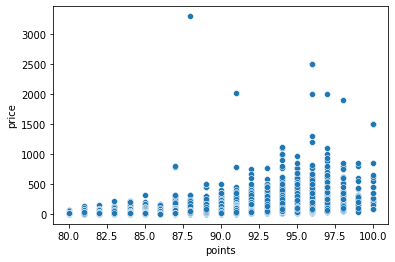

In [ ]:
# price vs points correlation
sns.scatterplot(y = df_reviews['price'], x = df_reviews['points'])

nan


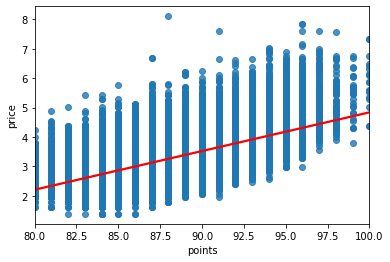

In [ ]:
# log price to better visualize
sns.regplot(y = np.log(df_reviews['price']), x = df_reviews['points'], line_kws={'color':'red'})

corr= np.corrcoef(np.log(df_reviews['price']), df_reviews['points'])[0,1]

print(round(corr,2))
#closely correlated

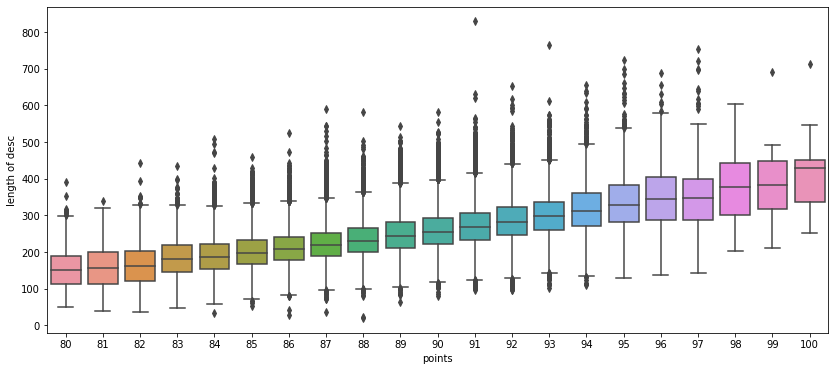

In [ ]:
#add desc length as feature

df_reviews = df_reviews.assign(desc_length = df_reviews['description'].apply(len))

plt.figure(figsize=(14,6))
g = sns.boxplot(x=df_reviews['points'], y=df_reviews['desc_length'])
g.set_ylabel('length of desc')
g.set_xlabel('points')
plt.show()

# closely correlated

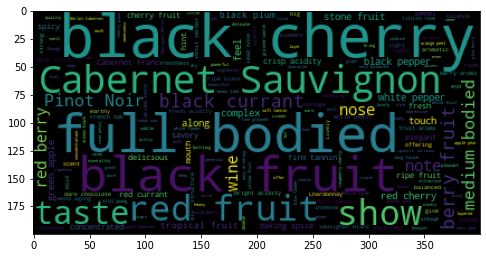

In [ ]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add('wine')
stopwords.add('drink')
stopwords.add('flavor')
stopwords.add('flavors')
stopwords.add('palate')

image = WordCloud(stopwords=stopwords,max_words=600,).generate(" ".join(df_reviews['description'].astype(str)))

fig = plt.figure(figsize = (8,10))
plt.imshow(image)
plt.show()

## Predict points based on desc

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



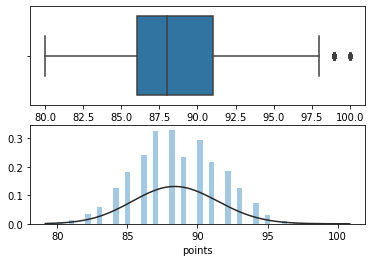

98.5
52
0


In [ ]:
# density of scores & outliers?
from scipy import stats

f, (ax_box, ax_hist) = plt.subplots(2)

sns.boxplot(x=df_reviews['points'], ax= ax_box)
sns.distplot(df_reviews['points'], ax=ax_hist, kde=False, fit=stats.gamma)

plt.show()


quartile_3 = np.quantile(df_reviews['points'], 0.75)
quartile_1 = np.quantile(df_reviews['points'], 0.25)
IQR = quartile_3 - quartile_1

outlier_threshold = quartile_3 + 1.5*IQR
outlier_threshold_low = quartile_1 - 1.5 * IQR
num_outliers = len(df_reviews[df_reviews['points'] > outlier_threshold])
num_outliers_low = len(df_reviews[df_reviews['points'] < outlier_threshold_low])

print(outlier_threshold)
print(num_outliers)
print(num_outliers_low)

# 52 outliers and all lie above 98.5
# scoring highest is rare (reviewers hard to please ?)

0.56


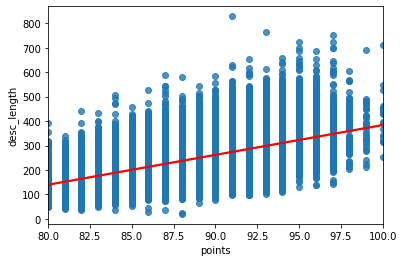

In [ ]:
sns.regplot(x=df_reviews['points'], y=df_reviews['desc_length'], line_kws={'color':'red'})

corr= np.corrcoef(df_reviews['points'], df_reviews['desc_length'])[0,1]

print(round(corr,2))

In [ ]:
#taking out the review description part to a dataframe X 
X = pd.DataFrame(df_reviews['description'])
X.columns = ['description']
X.shape

(129971, 1)

In [ ]:
X['description'] = X['description'].replace({'[^a-zA-Z0-9]': ' '}, regex=True)
X['description'] = X['description'].apply(lambda x: x.lower())
X.head(2)

,description
0,aromas include tropical fruit broom brimston...
1,this is ripe and fruity a wine that is smooth...


In [ ]:
#Lemmatize 
def sentenceLem(sentence):
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(sentence)
    temp_line=[] 
    lemmaline=[]
    
    for word in tokens:
        temp_line.append(lemmatizer.lemmatize(word, pos="v"))

    string=' ' 
    lemmaline.append(string.join(temp_line)) 
    lines=lemmaline
    str1=''
    lines=str1.join(lines)
    return lines

X['lemmatized'] = X['description'].apply(lambda x:sentenceLem(x))

In [ ]:
#drop stopwords

#set stopwords, add generic words
stop_words = list(stopwords)
l = ['wine','drink','flavors','palate','flavor', 'nan', 'de', 'ch', '2009', '2010','2011', '2012', '2013', '2014', '2015','2016', '2017', '2018',
                                                 '2019', '2020', '2021', '2022','2023', '2024', '2025', '2030', '100', '10', '12',
                                                 '14', '15', '20', '25', '30','40', '50', '60', '70', '90']
stop_words = stop_words + l


detokenizer = TreebankWordDetokenizer()# Detokenizer combines tokenized elements

def clean_description(desc):
  desc = word_tokenize(desc)
  desc = [w for w in desc if not w in stop_words and w.isalpha()]
  return detokenizer.detokenize(desc)

X['cleaned'] = X['lemmatized'].apply(lambda x:clean_description(x))


In [ ]:
X

,description,lemmatized,cleaned
0,aromas include tropical fruit broom brimston...,aromas include tropical fruit broom brimstone ...,aromas include tropical fruit broom brimstone ...
1,this is ripe and fruity a wine that is smooth...,this be ripe and fruity a wine that be smooth ...,ripe fruity smooth still structure firm tannin...
2,tart and snappy the flavors of lime flesh and...,tart and snappy the flavor of lime flesh and r...,tart snappy lime flesh rind dominate green pin...
3,pineapple rind lemon pith and orange blossom ...,pineapple rind lemon pith and orange blossom s...,pineapple rind lemon pith orange blossom start...
4,much like the regular bottling from 2012 this...,much like the regular bottle from 2012 this co...,much regular bottle come across rather rough t...
...,...,...,...
129966,notes of honeysuckle and cantaloupe sweeten th...,note of honeysuckle and cantaloupe sweeten thi...,note honeysuckle cantaloupe sweeten deliciousl...
129967,citation is given as much as a decade of bottl...,citation be give as much as a decade of bottle...,citation give much decade bottle age prior rel...
129968,well drained gravel soil gives this wine its c...,well drain gravel soil give this wine its cris...,well drain gravel soil give crisp dry characte...
129969,a dry style of pinot gris this is crisp with ...,a dry style of pinot gris this be crisp with s...,dry style pinot gris crisp acidity weight soli...


In [ ]:
df_reviews = df_reviews.assign(clean_desc = X['cleaned'])
df_reviews

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,desc_length,clean_desc
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,172,aromas include tropical fruit broom brimstone ...
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,227,ripe fruity smooth still structure firm tannin...
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,186,tart snappy lime flesh rind dominate green pin...
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,199,pineapple rind lemon pith orange blossom start...
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,249,much regular bottle come across rather rough t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),227,note honeysuckle cantaloupe sweeten deliciousl...
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,233,citation give much decade bottle age prior rel...
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,225,well drain gravel soil give crisp dry characte...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,216,dry style pinot gris crisp acidity weight soli...


In [ ]:
from sklearn.feature_extraction import text

customStopWords = text.ENGLISH_STOP_WORDS.union(['wine', 'drink', 'flavor', '2009', '2010','2011', '2012', '2013', '2014', '2015','2016', '2017', '2018',
                                                 '2019', '2020', '2021', '2022','2023', '2024', '2025', '2030', '100', '10', '12',
                                                 '14', '15', '20', '25', '30','40', '50', '60', '70', '90'])
cv = CountVectorizer(stop_words=customStopWords, max_features=1000, ngram_range=(1,2))

x = cv.fit_transform(df_reviews['clean_desc'].values)

print(x.shape)

(129971, 1000)


In [ ]:
x_array = x.toarray()

dict1 = dict([[v,k] for k,v in cv.vocabulary_.items()])

print((dict1))

final_dict = {}

for i in range(len(x_array[0,:])):
    final_dict[dict1[i]]=np.sum(x_array[:,i]) 

print("20 most frequent words:",sorted(final_dict.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)[0:20])


{37: 'aromas', 456: 'include', 926: 'tropical', 373: 'fruit', 275: 'dry', 435: 'herb', 464: 'isn', 622: 'overly', 321: 'expressive', 606: 'offer', 28: 'apple', 194: 'citrus', 777: 'sage', 19: 'alongside', 137: 'brisk', 5: 'acidity', 927: 'tropical fruit', 281: 'dry herb', 29: 'apple citrus', 138: 'brisk acidity', 751: 'ripe', 390: 'fruity', 823: 'smooth', 870: 'structure', 343: 'firm', 896: 'tannins', 470: 'juicy', 716: 'red', 79: 'berry', 272: 'drinkable', 166: 'certainly', 85: 'better', 756: 'ripe fruity', 345: 'firm tannins', 473: 'juicy red', 718: 'red berry', 82: 'berry fruit', 899: 'tart', 826: 'snappy', 507: 'lime', 349: 'flesh', 750: 'rind', 269: 'dominate', 415: 'green', 653: 'pineapple', 232: 'crisp', 849: 'stainless', 858: 'steel', 333: 'ferment', 233: 'crisp acidity', 850: 'stainless steel', 492: 'lemon', 659: 'pith', 616: 'orange', 114: 'blossom', 856: 'start', 87: 'bite', 615: 'opulent', 597: 'note', 448: 'honey', 529: 'mango', 961: 'way', 816: 'slightly', 51: 'astringent

In [ ]:
# binary classification

Y_values = df_reviews['points'].values

mean = np.mean(Y_values)
median = np.median(Y_values)
mean, median

Y_values[Y_values < median] = 0
Y_values[Y_values >= median] = 1

Y_values

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# sparse matrix + desc length = features

x = np.append(x.toarray(), df_reviews['desc_length'].values[:, None], axis=1)

x.shape

(129971, 1001)

In [ ]:
# train = 30%

X_train, X_test, y_train, y_test = train_test_split(x, Y_values, test_size=0.3, shuffle=True)

In [ ]:
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

              precision    recall  f1-score   support

           0       0.71      0.57      0.63     15482
           1       0.75      0.85      0.80     23510

    accuracy                           0.74     38992
   macro avg       0.73      0.71      0.71     38992
weighted avg       0.73      0.74      0.73     38992

[[ 8794  6688]
 [ 3580 19930]]
0.7078694205111673


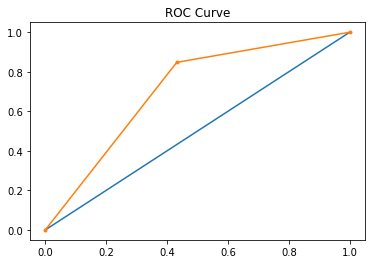

In [ ]:
# decision tree

decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=10)
decision_tree.fit(X_train, y_train)
y_predict = decision_tree.predict(X_test)


print(classification_report(y_test, y_predict))

print(confusion_matrix(y_test, y_predict))

print(roc_auc_score(y_test, y_predict))
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve")
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.77      0.74      0.76     15482
           1       0.84      0.85      0.84     23510

    accuracy                           0.81     38992
   macro avg       0.80      0.80      0.80     38992
weighted avg       0.81      0.81      0.81     38992

Accuracy of logistic regression classifier on test set: 0.81
[[11529  3953]
 [ 3482 20028]]
0.7982820213383184


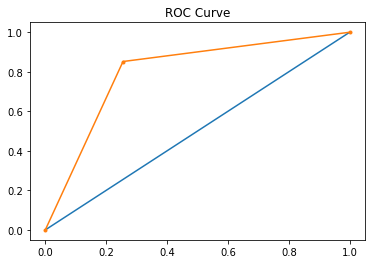

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


y_predict = logreg.predict(X_test)
print(classification_report(y_test, y_predict))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve")
plt.show()

## Collaborative filtering using KNN

In [ ]:
from scipy.sparse import csr_matrix

reviews = df_reviews.copy()
reviews = reviews.dropna(axis=0)
reviews = reviews.drop_duplicates(['province','variety'])
reviews_pivot = reviews.pivot(index= 'variety', columns='province', values='points').fillna(0)
print(reviews_pivot)

reviews_matrix = csr_matrix(reviews_pivot)

print(reviews_matrix)

province        Alsace  Andalucia  ...  Washington  Western Australia
variety                            ...                               
Abouriou           0.0        0.0  ...         0.0                0.0
Aglianico          0.0        0.0  ...         0.0                0.0
Airen              0.0        0.0  ...         0.0                0.0
Albana             0.0        0.0  ...         0.0                0.0
Albanello          0.0        0.0  ...         0.0                0.0
...                ...        ...  ...         ...                ...
White Riesling     0.0        0.0  ...         1.0                0.0
Xarel-lo           0.0        0.0  ...         0.0                0.0
Zibibbo            0.0        0.0  ...         0.0                0.0
Zinfandel          0.0        0.0  ...         1.0                0.0
Zweigelt           0.0        0.0  ...         1.0                0.0

[434 rows x 63 columns]
  (1, 8)	1.0
  (1, 22)	1.0
  (3, 11)	1.0
  (6, 56)	1.0
  (9, 7)	1

In [ ]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=10, metric='cosine')
model_knn = knn.fit(reviews_matrix)

In [ ]:
random_sample = np.random.choice(reviews_pivot.shape[0])
distance, indice = model_knn.kneighbors(reviews_pivot.iloc[random_sample,:].values.reshape(1,-1),n_neighbors=6)

d = defaultdict(list)
neighbors = []
for i in range(0, len(distance.flatten())):
    if  i == 0:
        print('Recommendations for {0}:\n'.format(reviews_pivot.index[random_sample]))
    else:
        neighbors.append(reviews_pivot.index[indice.flatten()[i]])
        print('{1} with distance: {2}'.format(i,reviews_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
       

d[reviews_pivot.index[random_sample]].append(neighbors)
print(d)

Recommendations for Friulano:

Red Blend with distance: 1.0
Provence red blend with distance: 1.0
Provence white blend with distance: 1.0
Prunelard with distance: 1.0
Primitivo with distance: 1.0
defaultdict(<class 'list'>, {'Friulano': [['Red Blend', 'Provence red blend', 'Provence white blend', 'Prunelard', 'Primitivo']]})


In [ ]:
reviews = df_reviews.copy()
reviews = reviews.dropna(axis=0)
reviews = reviews.drop_duplicates(['variety','taster_name'])
reviews_pivot = reviews.pivot(index= 'taster_name', columns='variety', values='points').fillna(0)
print(reviews_pivot)

reviews_matrix = csr_matrix(reviews_pivot)

print(reviews_matrix)

variety             Aglianico  Albana  ...  Xarel-lo  Zinfandel
taster_name                            ...                     
Alexander Peartree        0.0     0.0  ...       0.0        0.0
Anna Lee C. Iijima        0.0     0.0  ...       0.0        0.0
Anne Krebiehl MW          0.0     0.0  ...       0.0        0.0
Carrie Dykes              0.0     0.0  ...       0.0        0.0
Jim Gordon                0.0     0.0  ...       0.0       92.0
Joe Czerwinski            0.0     0.0  ...       0.0        0.0
Kerin O’Keefe            86.0    89.0  ...       0.0        0.0
Lauren Buzzeo             0.0     0.0  ...       0.0        0.0
Matt Kettmann             0.0     0.0  ...       0.0       87.0
Michael Schachner         0.0     0.0  ...      87.0        0.0
Paul Gregutt              0.0     0.0  ...       0.0       87.0
Roger Voss                0.0     0.0  ...       0.0        0.0
Sean P. Sullivan          0.0     0.0  ...       0.0       88.0
Susan Kostrzewa           0.0     0.0  .

In [ ]:
# user - user collaborative filtering

In [ ]:
knn = NearestNeighbors(n_neighbors=10, metric='cosine')
model_knn = knn.fit(reviews_matrix)

In [ ]:
random_sample = np.random.choice(reviews_pivot.shape[0])
distance, indice = model_knn.kneighbors(reviews_pivot.iloc[random_sample,:].values.reshape(1,-1),n_neighbors=6)
d = defaultdict(list)
neighbors = []
for i in range(0, len(distance.flatten())):
    if  i == 0:
        print('Recommendations for {0}:\n'.format(reviews_pivot.index[random_sample]))
    else:
        neighbors.append(reviews_pivot.index[indice.flatten()[i]])
        print('{1} with distance: {2}'.format(i,reviews_pivot.index[indice.flatten()[i]],distance.flatten()[i]))

d[reviews_pivot.index[random_sample]].append(neighbors)
print(d)

Recommendations for Paul Gregutt:

Sean P. Sullivan with distance: 0.5405684613166906
Matt Kettmann with distance: 0.6456306203645313
Anna Lee C. Iijima with distance: 0.6656760750821341
Virginie Boone with distance: 0.6662492171188275
Jim Gordon with distance: 0.6799897595084539
defaultdict(<class 'list'>, {'Paul Gregutt': [['Sean P. Sullivan', 'Matt Kettmann', 'Anna Lee C. Iijima', 'Virginie Boone', 'Jim Gordon']]})


In [ ]:
#recommend three highest rated wines from the k neighbors 

df_taster = df_reviews[['taster_name','variety','points','title']]
grouped_user = df_taster.groupby(['taster_name','variety','title'],as_index=False)['points'].mean()

neighbors = d[reviews_pivot.index[random_sample]]

print('Recommendations for {0}:\n'.format(reviews_pivot.index[random_sample]))
for i in neighbors[0]:
    recs =[] 
    top3 = grouped_user.loc[grouped_user['taster_name']==i].sort_values('points', ascending=False)[:3]
    recs.append(top3['title'].values)
    print('recs from',i,'\n', recs, '\n')

Recommendations for Paul Gregutt:

recs from Sean P. Sullivan 
 [array(['Northstar 2012 Premier Merlot (Columbia Valley (WA))',
       'Bunnell 2011 Fête BDX Red (Snipes Mountain)',
       'Brian Carter Cellars 2012 Opulento Red (Yakima Valley)'],
      dtype=object)] 

recs from Matt Kettmann 
 [array(['Giornata 2012 French Camp Vineyard Aglianico (Paso Robles)',
       'Testarossa 2015 Niclaire Pinot Noir (California)',
       'Timbre 2013 Guest Star Pinot Noir (San Luis Obispo County)'],
      dtype=object)] 

recs from Anna Lee C. Iijima 
 [array(['Fjord 2016 Albariño (Hudson River Region)',
       'Joh. Jos. Prüm 2013 Bernkasteler Badstube Auslese Riesling (Mosel)',
       'Joh. Jos. Prüm 2011 Graacher Himmelreich Kabinett Riesling (Mosel)'],
      dtype=object)] 

recs from Virginie Boone 
 [array(['Clif Family 2016 Sauvignon Blanc (Oak Knoll District)',
       'Kale 2010 Alder Springs Vineyard Spirit Rock Syrah (Mendocino County)',
       'Keating 2013 Petite Sirah (Rockpile)'],

In [ ]:
#@ff



## playing w desc & first dataset (useful?)

In [ ]:
# df.iloc[:3,12]

means = []
properties = ['high fixed acidity', 'high volatile acidity', 'high citric acid', 'sweet', 'salty', 'free sulfir dioxide', 'total sulfur dioxide', 'high density', 'pH', 'sulphates', 'alcohol', 'quality']
for x in range(1, len(df.columns)):
  means.append(np.mean(df.iloc[:,x]))

NameError: ignored

In [ ]:
means, properties

([],
 ['high fixed acidity',
  'high volatile acidity',
  'high citric acid',
  'sweet',
  'salty',
  'free sulfir dioxide',
  'total sulfur dioxide',
  'high density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [ ]:
sample = df.iloc[0, 1:]
description = ''
for x in range(1, len(sample)):
  if (sample[x] >= means[x]):
    description = description + ' ' + str(properties[x])
print(description)

df_reviews.loc[len(df_reviews)] = ['NaN']* 11

NameError: ignored

In [ ]:
df_reviews.iloc[-1:,1] = description


In [ ]:
df_reviews

In [ ]:
df_reviews = df_reviews.replace({'[^a-zA-Z0-9]': ' '}, regex=True)
df_reviews = df_reviews.apply(lambda x: x.astype(str).str.lower())

In [ ]:
X

In [ ]:
#Ngram (range(1,2))
#set a threshold M (appears at least M number of times)
M = 0.01


vectorizer = CountVectorizer(ngram_range=(1, 3), min_df=M, lowercase=False)
BOW_X = vectorizer.fit_transform(X['cleaned'])
print(BOW_X.toarray().astype(float))

vocab_100times = vectorizer.get_feature_names()
print(vocab_100times)
print(len(vocab_100times))

In [ ]:
# clustering the vocabularies in the word vector .. for possible grouping related to the chemical qualities


from sklearn.cluster import KMeans
obj_scores = [] 
for k in range(1,20):
  model = KMeans(n_clusters=k, random_state=0).fit(BOW_X)
  obj_scores.append(-model.score(BOW_X))

  print('k=',k,' Kmeans Objective: %.2f' %-model.score(BOW_X))


In [ ]:
ks = range(1,11)
plt.plot(ks,obj_scores, '.-', markersize=15)
plt.xlabel("Number of clusters k")
plt.ylabel("Objective Function Value")
plt.scatter([6],115276.75, s=200, c='y')

In [ ]:

def fit_kmeans(X,k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    dist = kmeans.transform(X)
    return {'centers':kmeans.cluster_centers_,'labels':kmeans.labels_,'inertia':kmeans.inertia_,'dist':dist}


clusters = fit_kmeans(BOW_X,6)

In [ ]:

X1 = X['cleaned']
groups = [X1[clusters['labels']==i] for i in range(5)]

cluster = []
for i in groups:
  cluster.append(i[:])

In [ ]:
def top100_clusterwords(cluster): 
    word_occurrence = []
    for c in cluster:
        separator = ' '
        joined = separator.join(c)
        temp = clean_description(joined)
        c100 = pd.DataFrame(temp.split()).stack().value_counts()[:100]
        print(c100[:10])
        word_occurrence.append(c100)                        

top100 = top100_clusterwords(cluster)
top100

### combining other columns (country/title/winery etc)

In [ ]:
df_reviews.columns

In [ ]:
df_reviews.head(2)

In [ ]:
X['combined'] = X['cleaned'] + ' ' + df_reviews['country'] + ' ' + df_reviews['designation'] + ' ' + df_reviews['province'] + ' ' + df_reviews['region_1']+ ' ' + df_reviews['title']+ ' ' + df_reviews['variety']  + ' ' + df_reviews['winery'] 

In [ ]:
X['combined'][0]

In [ ]:
#Ngram (range(1,2))
#set a threshold M (appears at least M number of times)
M = 100


vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=M, lowercase=False)
BOW_X = vectorizer.fit_transform(X['combined'])
print(BOW_X.toarray().astype(float))

vocab_100times = vectorizer.get_feature_names()
print(vocab_100times)
print(len(vocab_100times))

In [ ]:
#Kmeans Clustering on the combined word vectors
clusters = fit_kmeans(BOW_X,6)
X1 = X['combined']
groups = [X1[clusters['labels']==i] for i in range(5)]

cluster = []
for i in groups:
  cluster.append(i[:])

In [ ]:
top100_combined = top100_clusterwords(cluster)
top100_combined

#oh we should add 'nan' and 'de' to the stopwords.. 
#'valley'.. from napa valley? lol the first cluster is definitely Napa valley, CA cluster full of white wines 